# Set Up

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

from xgboost import XGBClassifier

%matplotlib inline

## Constants

In [208]:
DATA = "titanic.csv"
TARGET = "Survived"

# EDA

In [209]:
df = pd.read_csv(DATA)

In [210]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [212]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [213]:
df[TARGET] = df[TARGET].astype(str)
df["Pclass"] = df["Pclass"].astype(str)
df["SibSp"] = df["SibSp"].astype(str)
df["Parch"] = df["Parch"].astype(str)

In [214]:
df.describe(include="object")

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
count,891,891,891,891,891,891,891,204,889
unique,2,3,891,2,7,7,681,147,3
top,0,3,"Braund, Mr. Owen Harris",male,0,0,347082,B96 B98,S
freq,549,491,1,577,608,678,7,4,644


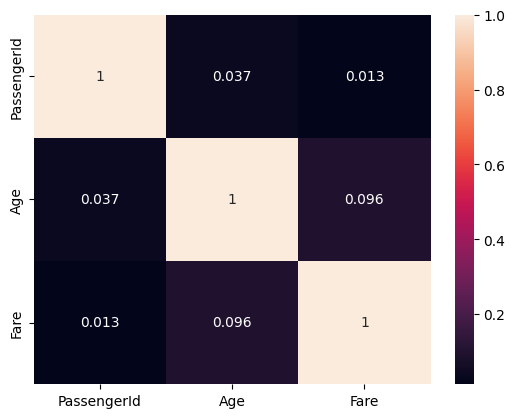

In [215]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

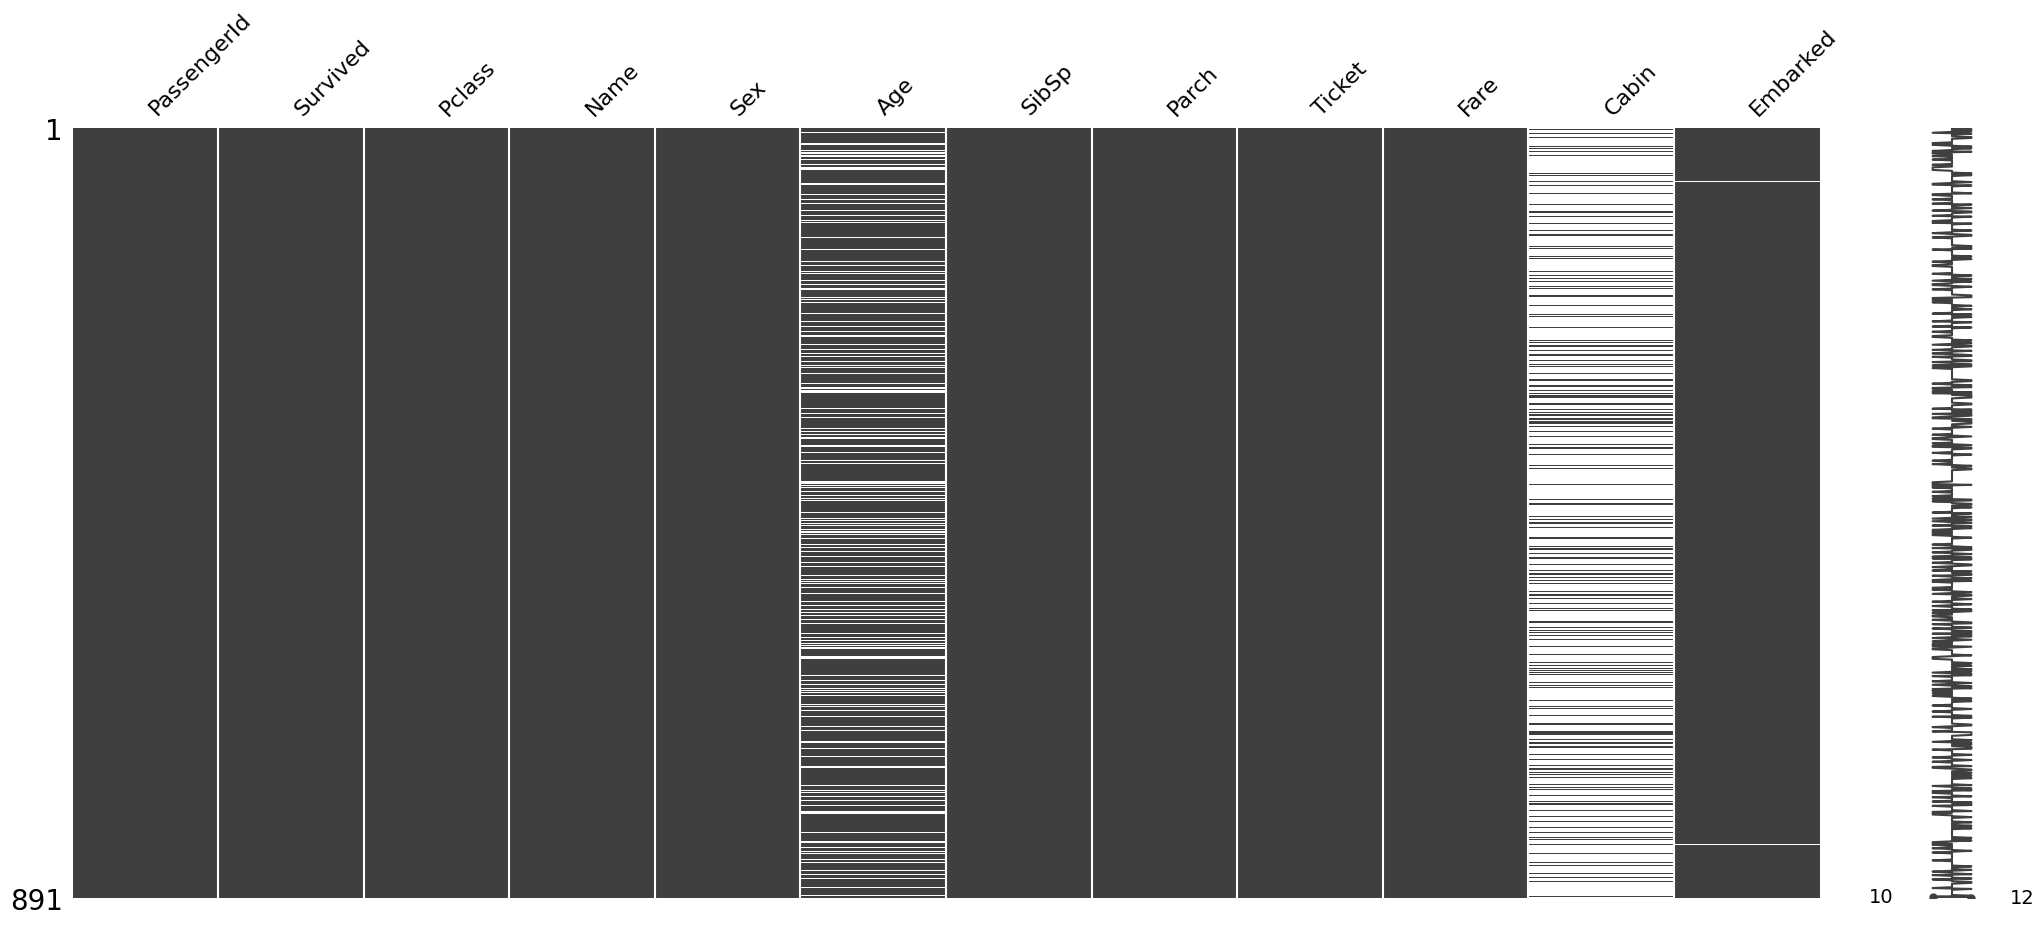

In [216]:
msno.matrix(df);

In [217]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

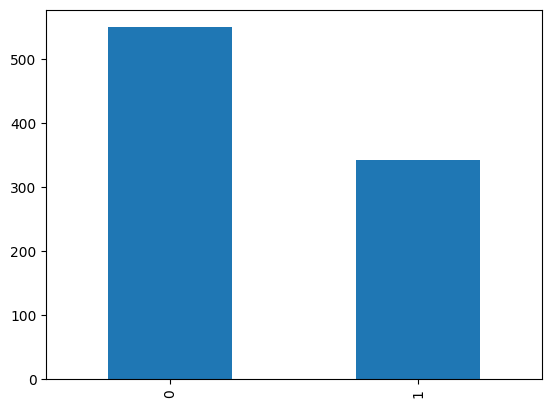

In [218]:
vc = df[TARGET].value_counts()
vc.plot.bar();

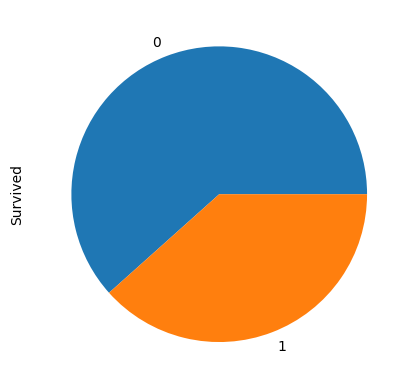

In [219]:
df[TARGET].value_counts().plot.pie();

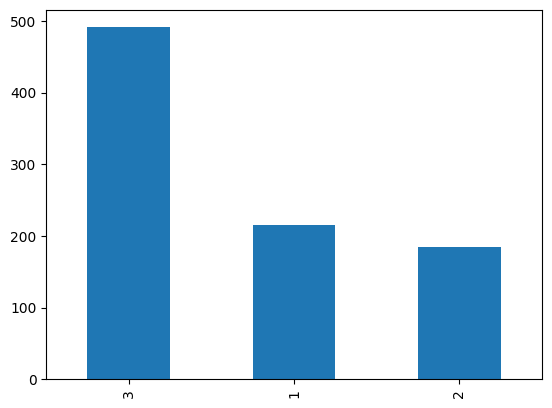

In [220]:
vc = df["Pclass"].value_counts()
vc.plot.bar();

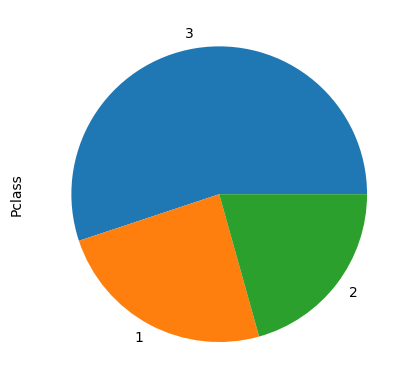

In [221]:
df["Pclass"].value_counts().plot.pie();

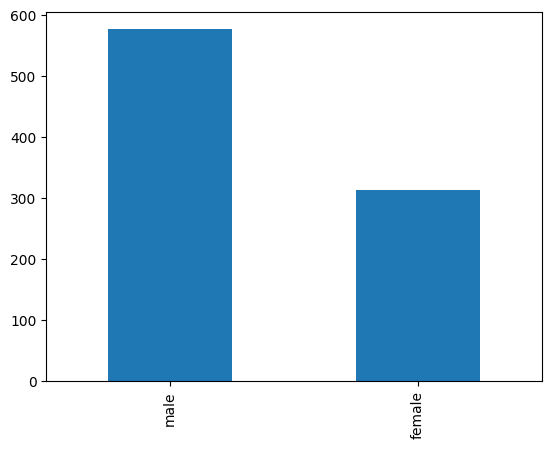

In [222]:
vc = df["Sex"].value_counts()
vc.plot.bar();

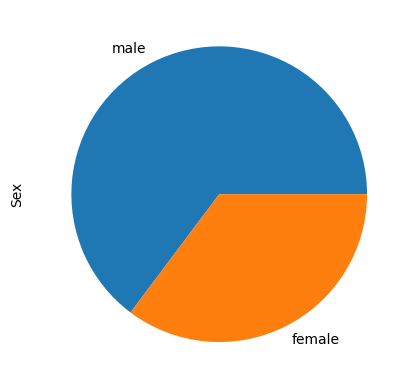

In [223]:
vc = df["Sex"].value_counts().plot.pie();

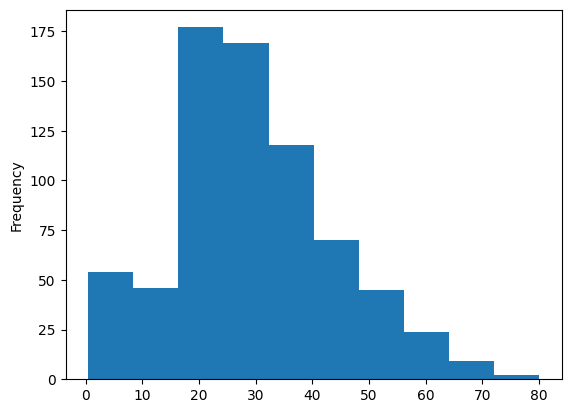

In [224]:
df["Age"].plot.hist();

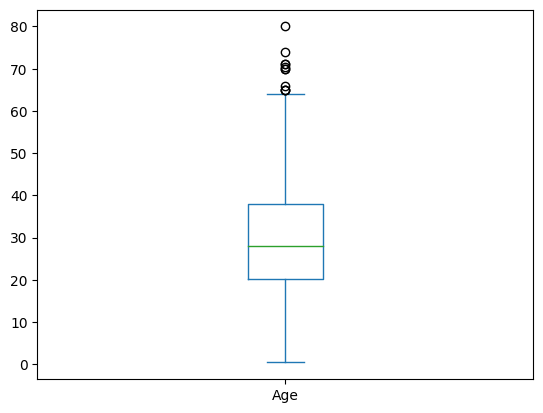

In [225]:
df["Age"].plot.box();

In [226]:
df["Age_"] = df["Age"].fillna(df["Age"].median())

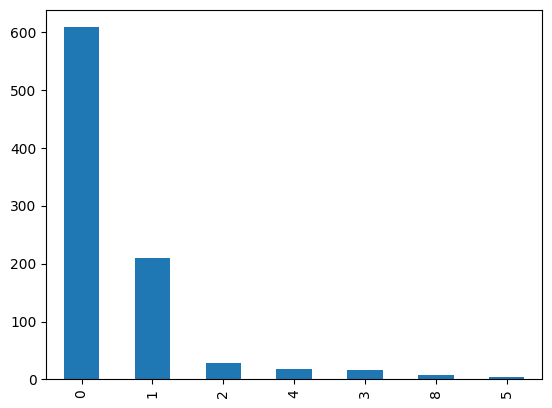

In [227]:
vc = df["SibSp"].value_counts()
vc.plot.bar();

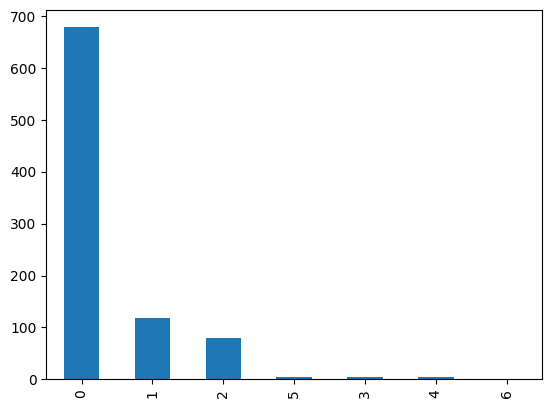

In [228]:
vc = df["Parch"].value_counts()
vc.plot.bar();

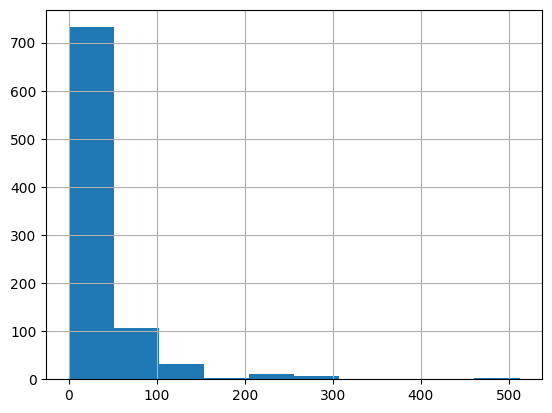

In [229]:
df["Fare"].hist();

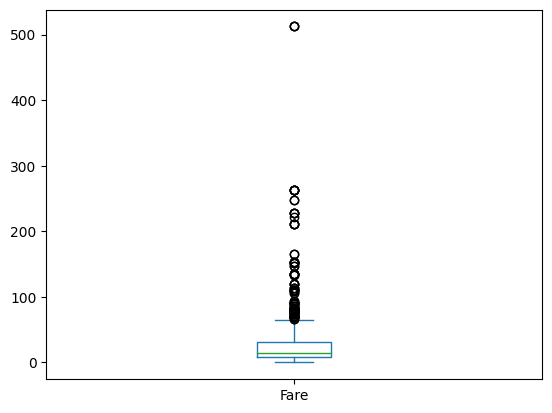

In [230]:
df["Fare"].plot.box();

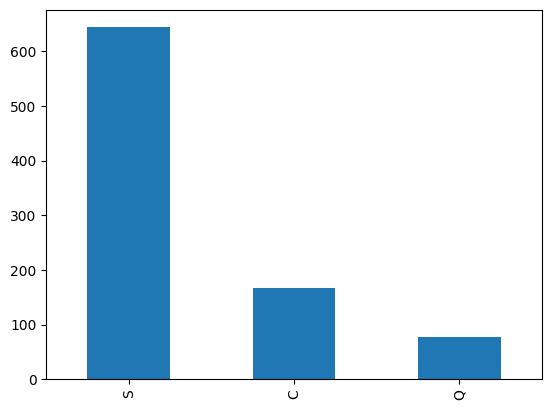

In [231]:
vc = df["Embarked"].value_counts()
vc.plot.bar();

In [232]:
df["Embarked_"] = df["Embarked"].fillna(df["Embarked"].value_counts().index[0])

In [233]:
df["Cabin_"] = df["Cabin"]
df["Cabin_"] = df["Cabin_"].fillna("Missed")
df["Cabin_"] = df["Cabin_"].apply(lambda x: x[0] if x != "Missed" else x)

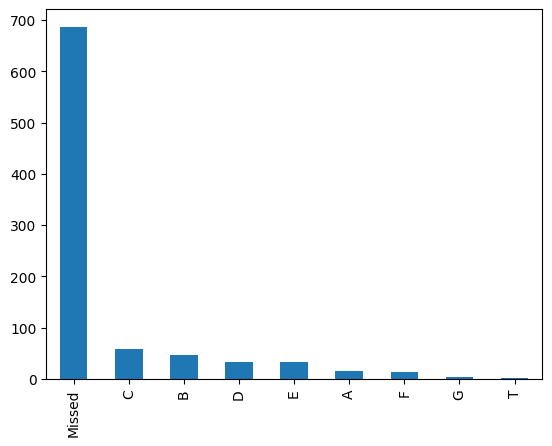

In [234]:
df["Cabin_"].value_counts().plot.bar();

In [235]:
df[df.isna().all(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_,Embarked_,Cabin_


# Data Preparation

In [236]:
list(df.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Age_',
 'Embarked_',
 'Cabin_']

In [237]:
df = df.drop("Name", axis=1)
df = df.drop("PassengerId", axis=1)
df = df.drop("Age", axis=1)
df = df.drop("Ticket", axis=1)
df = df.drop("Cabin", axis=1)
df = df.drop("Embarked", axis=1)

In [238]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age_,Embarked_,Cabin_
0,0,3,male,1,0,7.2500,22.0,S,Missed
1,1,1,female,1,0,71.2833,38.0,C,C
2,1,3,female,0,0,7.9250,26.0,S,Missed
3,1,1,female,1,0,53.1000,35.0,S,C
4,0,3,male,0,0,8.0500,35.0,S,Missed
...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,27.0,S,Missed
887,1,1,female,0,0,30.0000,19.0,S,B
888,0,3,female,1,2,23.4500,28.0,S,Missed
889,1,1,male,0,0,30.0000,26.0,C,C


## Target

In [239]:
df[TARGET] = df[TARGET].astype(str)

In [240]:
le = LabelEncoder()
df[TARGET] = le.fit_transform(df[TARGET])

## OHE

In [241]:
cat_cols = ["Pclass", "Sex", "SibSp", "Parch", "Embarked_", "Cabin_"]

In [242]:
pd.get_dummies(df[cat_cols], drop_first=True)

,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,...,Embarked__Q,Embarked__S,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__Missed,Cabin__T
0,0,1,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
887,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
888,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
889,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [243]:
df = pd.concat([df.drop(cat_cols, axis=1), pd.get_dummies(df[cat_cols], drop_first=True)], axis=1)

## Train / test split

In [244]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(TARGET, axis=1), df[TARGET], test_size=0.3, stratify=df[TARGET])

In [245]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)

In [246]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

## Normalisation

In [247]:
scaler = StandardScaler()

In [248]:
num_cols = ["Fare", "Age_"]
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [249]:
X_train

,Fare,Age_,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Embarked__Q,Embarked__S,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__Missed,Cabin__T
402,-0.459966,-0.628521,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
17,-0.394804,-0.112305,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
287,-0.499559,-0.554776,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
556,0.151119,1.362600,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312,-0.128000,-0.259795,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.973081,1.657581,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
522,-0.513327,-0.112305,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
164,0.152915,-2.103426,0,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
799,-0.165968,0.035186,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


# Modelling

## Baseline

In [250]:
lr = LogisticRegression()

In [251]:
lr.fit(X_train, y_train)

LogisticRegression()

In [252]:
y_pred = lr.predict(X_val)
acc = accuracy_score(y_val, y_pred)
f1_mic = f1_score(y_val, y_pred, average='micro')
f1_mac = f1_score(y_val, y_pred, average='macro')
print(f"Accuracy: {round(acc, 2)}; F1(mic): {round(f1_mic, 2)}; F1(mac): {round(f1_mac, 2)}")

Accuracy: 0.77; F1(mic): 0.77; F1(mac): 0.77


## XGB

In [253]:
cls = XGBClassifier()

In [254]:
cls.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [256]:
y_pred = cls.predict(X_val)
acc = accuracy_score(y_val, y_pred)
f1_mic = f1_score(y_val, y_pred, average='micro')
f1_mac = f1_score(y_val, y_pred, average='macro')
print(f"Accuracy: {round(acc, 2)}; F1(mic): {round(f1_mic, 2)}; F1(mac): {round(f1_mac, 2)}")

Accuracy: 0.83; F1(mic): 0.83; F1(mac): 0.83
